In [ ]:
%load_ext autoreload
%autoreload 2

# Testing train_model
The purpose of this notebook is to test the functionality of the `train_model` function in the `training.py` script.

## Imports

In [2]:
from functools import partial

import jax
import jax.numpy as jnp
from jax import random
from flax import linen as nn
from modularRNN.model import CTRNNCell
from modularRNN.task import ModularArithmeticTask
from modularRNN.training import create_train_state, train_model

import matplotlib.pyplot as plt

In [3]:
key = random.PRNGKey(0)

## Create testing and training datasets

In [4]:
key, subkey = random.split(key)
training_trials = 3200
testing_trials = 320
train_batch_size = 128
mod_set = jnp.array([5])
pulse_distribution = partial(random.poisson, lam=8)

modtask = ModularArithmeticTask(subkey, training_trials, testing_trials, train_batch_size, mod_set, pulse_distribution,)
training_dataset, testing_dataset = modtask.tf_datasets()

100%|████████████████████████████████████████| 320/320 [00:00<00:00, 363.86it/s]


## Create CT-RNN

In [5]:
features = 100
alpha = jnp.float32(0.1)
noise = jnp.float32(0.05)
out_shape = 10

ctrnn = nn.RNN(CTRNNCell(features=features, alpha=alpha, noise=noise, out_shape=out_shape,))

## Train CT-RNN

In [6]:
lr = 0.01
epochs = 300

In [7]:
key, subkey = random.split(key)
state = create_train_state(ctrnn, subkey, lr,)

In [8]:
key, subkey = random.split(key)
results = train_model(
    subkey, 
    state, 
    training_dataset, 
    testing_dataset, 
    epochs,
)

2024-04-03 15:40:12.443273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:15.014825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:17.250646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:19.350540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:21.342743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:23.384289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:40:25.443625: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 50:
train_loss: 0.06831977516412735
test_loss: 0.06801686435937881




2024-04-03 15:41:58.466701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:00.570535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:02.618234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:04.685839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:06.710152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:08.721126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:42:10.731856: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 100:
train_loss: 0.054727233946323395
test_loss: 0.05507746338844299




2024-04-03 15:43:40.842299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:42.917038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:44.939327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:47.030805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:49.105588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:51.179662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:43:53.209262: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 150:
train_loss: 0.029841015115380287
test_loss: 0.03371817246079445




2024-04-03 15:45:23.833075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:25.867100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:27.928012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:29.979508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:32.042507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:34.097365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:45:36.107622: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 200:
train_loss: 0.01562633365392685
test_loss: 0.01536585669964552




2024-04-03 15:47:06.638136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:08.686533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:10.724404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:12.726042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:14.814572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:16.848578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:47:18.903847: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 250:
train_loss: 0.005404402036219835
test_loss: 0.006473627872765064




2024-04-03 15:48:49.666646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:48:51.767346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:48:53.810940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:48:55.870477: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:48:57.883754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:48:59.932526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-03 15:49:02.006846: W tensorflow/core/framework/local_rendezvous.cc:404] L

Metrics after epoch 300:
train_loss: 0.0024933675304055214
test_loss: 0.0031200109515339136




2024-04-03 15:50:31.036975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Test CT-RNN

In [9]:
for _inputs, _outputs in testing_dataset.as_numpy_iterator():
    pass

2024-04-03 15:50:31.322354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
key, subkey = random.split(key)
z_0, rates_0 = ctrnn.apply(results["min_test_loss_params"].params, _inputs, init_key=subkey,)

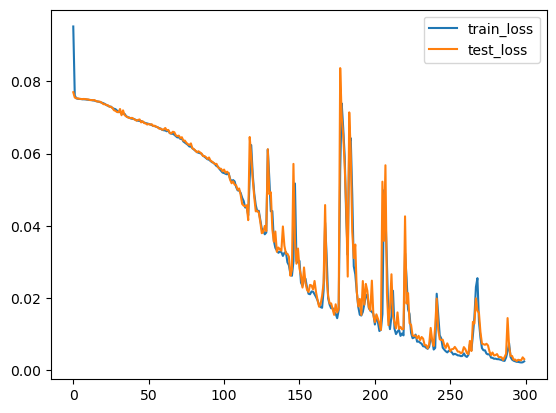

In [11]:
plt.plot(results['metrics_history'].history['train_loss'], label='train_loss')
plt.plot(results['metrics_history'].history['test_loss'], label='test_loss')
plt.legend()
plt.show()

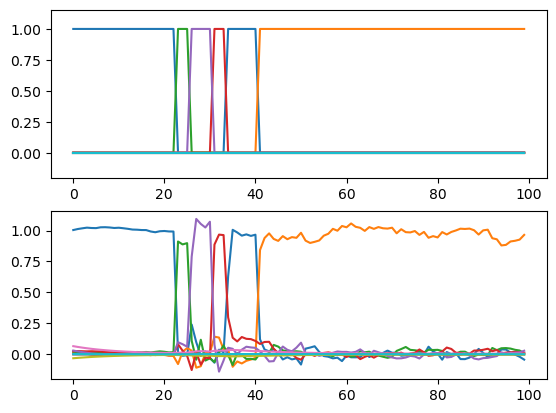

In [12]:
fig, axs = plt.subplots(2, 1, sharey=True)

axs[0].plot(_outputs[0,:,:])
axs[1].plot(z_0[0,:,:])

plt.show()

In [13]:
results['metrics_history'].save_to_csv('../data/script_tests/metrics_history.csv')